In [1]:
import os
import sys
jupyter_module_path = os.path.join( os.getcwd(), '..', '..', 'jupyter' )
sys.path.append( jupyter_module_path )

from ef_jupyter_visualize import *

In this example, an equation for a contour of an axially symmetric
beam propagating in free space is checked.

Suppose there is an axially symmetric charged particles beam propagating
in free space.
Under certain set of approximations, trajectory of a particle on the edge 
of the beam can be described by the following expressions:

<!-- ![](http://mathurl.com/y7dt7wdq.png) -->
\begin{align}
  & r = r(0) e^{u^2}
  \\
  & z = 
  \left( \dfrac{m v^3}{q I} \right)^{1/2}
  r(0)
  \int_{0}^{u} e^{u^2} du
\end{align}


where $u$ is a parameter, $v$ is speed of particles along the $z$ axis,
$r(0)$ is initial radius and $I$ is full current of the beam.
Derivation of these relations can be found in supplementary notebook [link].

These equations define a contour of the beam $r(z)$. It is possible to perform 
a numerical simulation of a beam propagating in free space and 
plot particles coordinates on the X-Z or Y-Z plane. 
This will allow to compare the numerical profile
with the analytical expression. 

The beam will become $e = 2.71$ times wider than the initial at $u = 1$.
For this value of the parameter, the integral in the $z$ equation 
[approximately equals to](https://www.wolframalpha.com/input/?i=integrate%28+e^u^2,+u,+0,+1+%29) $1.46$. 
Since the speed in the $z$-direction is assumed constant, it is possible to estimate the time needed for  
particles to pass this distance as

<!-- ![](http://mathurl.com/yaaqzzhs.png) -->
\begin{align}
  t \approx 
  1.5 \left( \dfrac{m v}{q I} \right)^{1/2}
  r(0)
\end{align}

Let's substitute some numerical values (see the cell below). Suppose there is an electron beam ($q = 4.8 \cdot 10^{-10} ~ [\mbox{cgs}], ~ m = 9.1 \cdot 10^{-28} ~ [\mbox{g}]$) with full current $I = 0.1 ~ [\mbox{A}] = 2.998 \cdot 10^{8} ~ [\mbox{cgs}]$ and initial radius $r(0) = 0.5 ~ [\mbox{cm}]$. 
Energy of it's particles equals to 1 keV, so that speed is $v = 1.808 \cdot 10^{9} ~ [\mbox{cm/s}]$.
For this beam to get $2.71$ times wider (from $0.5 ~ [\mbox{cm}]$ to $1.36 ~ [\mbox{cm}]$), it takes $t = 2.63 \cdot 10^{-9} ~ [\mbox{s}]$ seconds.
This happens over a distance $z = 4.632 ~ [\mbox{cm}]$.

In [2]:
from math import *

m = 9.8e-28
q = 4.8e-10
print( "q = {:.3e} [cgs]".format( q ) )
print( "m = {:.3e} [g]".format( m ) )

r_0 = 0.5
print( "beam_radius = {:.3e} [cm]".format( r_0 ) )

ampere_to_cgs = 2997924536.8431
I = 0.1 * ampere_to_cgs
print( "I = {:.3e} [A] = {:.3e} [cgs]".format( I / ampere_to_cgs, I ) )

ev_to_cgs = 1.60218e-12
E = 1000 * ev_to_cgs
v = sqrt( 2 * E / m )
print( "E = {:.3e} [eV] = {:.3e} [erg]".format( E / ev_to_cgs, E ) )
print( "v = {:.3e} [cm/s]".format( v ) )

r0_e_times_wider = e * r_0
z_e_times_wider = 1.46 * sqrt( m * v**3 / q / I ) * r_0
t_e_times_wider = 1.5 * sqrt( m * v / q / I ) * r_0
print( "r0_e_times_wider = {:.3e} [cm]".format( r0_e_times_wider ) )
print( "t_e_times_wider = {:.3e} [s]".format( t_e_times_wider ) )
print( "z_e_times_wider = {:.3e} [cm]".format( z_e_times_wider ) )

q = 4.800e-10 [cgs]
m = 9.800e-28 [g]
beam_radius = 5.000e-01 [cm]
I = 1.000e-01 [A] = 2.998e+08 [cgs]
E = 1.000e+03 [eV] = 1.602e-09 [erg]
v = 1.808e+09 [cm/s]
r0_e_times_wider = 1.359e+00 [cm]
t_e_times_wider = 2.632e-09 [s]
z_e_times_wider = 4.632e+00 [cm]


These estimates can be used as a basis for config file parameters. 

In [3]:
axially_symmetric_beam_conf = EfConf()

Full simulation time is set to 3.0e-9 [s]. There are 100 time steps, with each 10th step written to file.

In [4]:
sim_time = 3.0e-9
n_of_steps = 100
dt = sim_time / n_of_steps
save_each_step = 10
dt_save = dt * save_each_step
print( "simulation_time = {:.3e} [s]".format( sim_time ) )
print( "number_of_time_steps = {:d}".format( n_of_steps ) )
print( "time_step_size = {:.3e} [s]".format( dt ) )
print( "time_save_step = {:.3e} [s]".format( dt_save ))

axially_symmetric_beam_conf.time_grid.total_time = sim_time
axially_symmetric_beam_conf.time_grid.time_step_size = dt
axially_symmetric_beam_conf.time_grid.time_save_step = dt_save

print( axially_symmetric_beam_conf.time_grid.export() )

simulation_time = 3.000e-09 [s]
number_of_time_steps = 100
time_step_size = 3.000e-11 [s]
time_save_step = 3.000e-10 [s]
{'Time grid': {'total_time': 3e-09, 'time_save_step': 3e-10, 'time_step_size': 3e-11}}


The simulation domain is defined as

In [5]:
axially_symmetric_beam_conf.spatial_mesh = SpatialMesh(
    grid_x_size = 5.0, 
    grid_x_step = 0.1,
    grid_y_size = 5.0, 
    grid_y_step = 0.1,
    grid_z_size = 10.0,
    grid_z_step = 0.1 )

with z size approximately two times the estimated value, with 100 nodes in that direction. X and y sizes are 10 times the radius with 50 nodes in each direction.

The source is centered along the x and y axes and is close to origin along the z. For a time step dt = 3.00e-11 [s], to provide a current I = 0.1 [A] the source has to generate $n = I ~ dt ~/~ q = 1.87 \cdot 10^7$ particles each time step. This is not computationally feasible, so instead let's fix an amount of generated particles to 5000 at each step. The charge of macroparticles should be $Q = I ~ dt ~/~ n = 1.799 \cdot 10^{-6} ~ [\mbox{cgs}]$ To preserve charge-to-mass ratio, mass of the macroparticles should be set to $M = Q ~/~ q_e ~ m_e = 3.672 \cdot 10^{-24} ~ [\mbox{g}]$. To have the same initial velocity as electrons, mean momentum should be set to $p = M ~ v = 6.641 \cdot 10^{-15} ~ [\mbox{g * cm / s}]$.

In [6]:
num_of_real_particles = I * dt / q
print( "num_of_real_particles = {:.3e}".format( num_of_real_particles ) )

num_of_macro_particles = 5000
macro_q = I * dt / num_of_macro_particles
macro_m = macro_q / q * m
macro_mean_momentum = macro_m * v
print( "num_of_macro_particles = {:d}".format( num_of_macro_particles ) )
print( "macro_q = {:.3e} [cgs]".format( macro_q ) )
print( "macro_m = {:.3e} [g]".format( macro_m ) )
print( "macro_mean_momentum = {:.3e} [g * cm / s]".format( macro_mean_momentum ) )


axially_symmetric_beam_conf.add_source( ParticleSourceCylinder(
    name = "cathode_emitter",
    initial_number_of_particles = num_of_macro_particles,
    particles_to_generate_each_step = num_of_macro_particles,
    cylinder_axis_start_x = axially_symmetric_beam_conf.spatial_mesh.grid_x_size / 2,
    cylinder_axis_start_y = axially_symmetric_beam_conf.spatial_mesh.grid_y_size / 2,
    cylinder_axis_start_z = 0.51,
    cylinder_axis_end_x = axially_symmetric_beam_conf.spatial_mesh.grid_x_size / 2,
    cylinder_axis_end_y = axially_symmetric_beam_conf.spatial_mesh.grid_y_size / 2,
    cylinder_axis_end_z = 0.52,
    cylinder_radius = 0.5,
    mean_momentum_x = 0,
    mean_momentum_y = 0,
    mean_momentum_z = macro_mean_momentum,
    temperature = 0.0,
    charge = -macro_q,
    mass = macro_m 
))

num_of_real_particles = 1.874e+07
num_of_macro_particles = 5000
macro_q = 1.799e-06 [cgs]
macro_m = 3.672e-24 [g]
macro_mean_momentum = 6.641e-15 [g * cm / s]


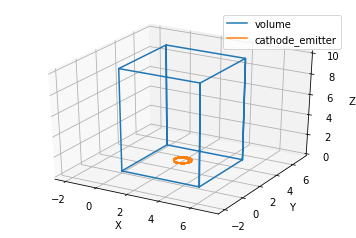

In [7]:
axially_symmetric_beam_conf.visualize()

Potential is zero on each boundary of the domain.

In [8]:
axially_symmetric_beam_conf.boundary_conditions = BoundaryConditions( 
    boundary_phi_right = 0, boundary_phi_left = 0,
    boundary_phi_bottom = 0, boundary_phi_top = 0,
    boundary_phi_near = 0, boundary_phi_far = 0 
)

Other config parameters:

In [13]:
axially_symmetric_beam_conf.output_file = OutputFile(
    output_filename_prefix = "contour_jup_", 
    output_filename_suffix = ".h5")
axially_symmetric_beam_conf.particle_interaction_model = ParticleInteractionModel(
    particle_interaction_model = "PIC" )

In [14]:
axially_symmetric_beam_conf.print_config()

[ParticleInteractionModel]
particle_interaction_model  =  PIC

[OutputFilename]
output_filename_prefix  =  contour_jup_
output_filename_suffix  =  .h5

[BoundaryConditions]
boundary_phi_top  =  0
boundary_phi_bottom  =  0
boundary_phi_near  =  0
boundary_phi_left  =  0
boundary_phi_far  =  0
boundary_phi_right  =  0

[Time grid]
total_time  =  3e-09
time_save_step  =  3e-10
time_step_size  =  3e-11

[ParticleSourceCylinder.cathode_emitter]
cylinder_axis_start_x  =  2.5
charge  =  -1.7987547221058602e-06
mean_momentum_y  =  0
temperature  =  0.0
cylinder_axis_start_z  =  0.51
cylinder_axis_start_y  =  2.5
mean_momentum_x  =  0
particles_to_generate_each_step  =  5000
cylinder_axis_end_y  =  2.5
cylinder_axis_end_x  =  2.5
mean_momentum_z  =  6.640708217582056e-15
initial_number_of_particles  =  5000
cylinder_radius  =  0.5
cylinder_axis_end_z  =  0.52
mass  =  3.672457557632798e-24

[SpatialMesh]
grid_x_size  =  5.0
grid_y_size  =  5.0
grid_y_step  =  0.1
grid_z_size  =  10.0
grid_z_ste

In [15]:
axially_symmetric_beam_conf.run( 
    ef_command = "python3 ../../main.py", 
    workdir = "./",
    save_config_as = None)

command: python3 ../../main.py /tmp/tmp7as_k8j8.ini
b'Config file is:  /tmp/tmp7as_k8j8.ini'
b'[ ParticleInteractionModel ]'
b'particle_interaction_model = PIC'
b'[ OutputFilename ]'
b'output_filename_prefix = contour_jup_'
b'output_filename_suffix = .h5'
b'[ BoundaryConditions ]'
b'boundary_phi_top = 0'
b'boundary_phi_bottom = 0'
b'boundary_phi_near = 0'
b'boundary_phi_left = 0'
b'boundary_phi_far = 0'
b'boundary_phi_right = 0'
b'[ Time grid ]'
b'total_time = 3e-09'
b'time_save_step = 3e-10'
b'time_step_size = 3e-11'
b'[ ParticleSourceCylinder.cathode_emitter ]'
b'cylinder_axis_start_x = 2.5'
b'charge = -1.7987547221058602e-06'
b'mean_momentum_y = 0'
b'temperature = 0.0'
b'cylinder_axis_start_z = 0.51'
b'cylinder_axis_start_y = 2.5'
b'mean_momentum_x = 0'
b'particles_to_generate_each_step = 5000'
b'cylinder_axis_end_y = 2.5'
b'cylinder_axis_end_x = 2.5'
b'mean_momentum_z = 6.640708217582056e-15'
b'initial_number_of_particles = 5000'
b'cylinder_radius = 0.5'
b'cylinder_axis_end_z = 0.5

KeyboardInterrupt: 

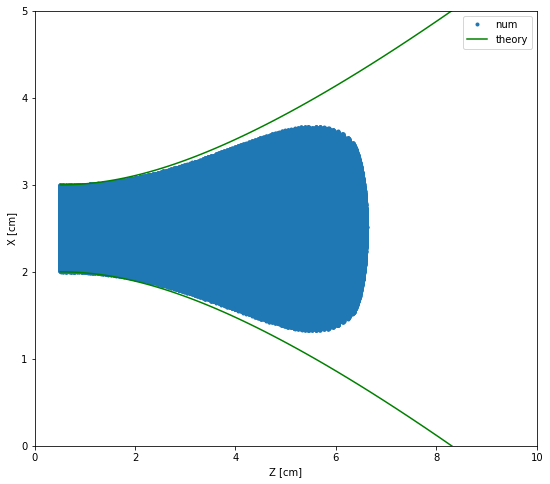

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

filename = 'contour_jup_0000100.h5'
h5file = h5py.File( filename, mode = "r" )

def get_source_current( h5file ):
    time_step = h5file["/TimeGrid"].attrs["time_step_size"]
    charge = h5file["/ParticleSources/cathode_emitter"].attrs["charge"]
    particles_per_step = h5file[
        "/ParticleSources/cathode_emitter"].attrs["particles_to_generate_each_step"]
    current = particles_per_step * charge / time_step
    return current
    
def get_source_geometry( h5file ):
    axis_start_x = \
        h5file["/ParticleSources/cathode_emitter"].attrs["cylinder_axis_start_x"]
    axis_start_z = \
        h5file["/ParticleSources/cathode_emitter"].attrs["cylinder_axis_start_z"]
    radius = h5file["/ParticleSources/cathode_emitter"].attrs["cylinder_radius"]
    return ( axis_start_x, axis_start_z, radius )

def get_source_particle_parameters( h5file ):
    mass = h5file["/ParticleSources/cathode_emitter"].attrs["mass"]
    charge = h5file["/ParticleSources/cathode_emitter"].attrs["charge"]
    momentum_z = h5file["/ParticleSources/cathode_emitter"].attrs["mean_momentum_z"]
    return ( mass, charge, momentum_z )

def beam_radius( u, r_0 ):
    return r_0 * np.exp( u ** 2 )

def beam_z( u, m, v, q, I, r_0 ):
    coeff = np.sqrt( m * v**3 / q / I ) * r_0
    subint = lambda t: np.exp( t * t )
    low_lim = 0
    up_lim = u
    integral_value = scipy.integrate.quad( subint, low_lim, up_lim )[0]
    return coeff * integral_value

beam_axis_x_pos, emitter_z_pos, r_0 = get_source_geometry( h5file )
I = get_source_current( h5file )
m, q, p = get_source_particle_parameters( h5file )
v = p / m

u_min = 0; u_max = 2; num_u_points = 100  # for u = 1, r = r(0) * 2.71812
u = np.linspace( u_min, u_max, num_u_points )
r_an = [ beam_radius( x, r_0 ) for x in u ]
r_an_upper = r_an + beam_axis_x_pos
r_an_lower = beam_axis_x_pos - r_an 
z_an = [ beam_z( x, m = m, v = v, q = q, I = I, r_0 = r_0 ) for x in u ]
z_an = z_an + emitter_z_pos

r_num = h5file["/ParticleSources/cathode_emitter/position_x"]
z_num = h5file["/ParticleSources/cathode_emitter/position_z"]

z_volume_size = h5file["/SpatialMesh"].attrs["z_volume_size"]
x_volume_size = h5file["/SpatialMesh"].attrs["x_volume_size"]
plt.xlabel( "Z [cm]" )
plt.ylabel( "X [cm]" )
plt.ylim( 0, x_volume_size )
plt.xlim( 0, z_volume_size )
plt.plot( z_num, r_num, '.', label = "num" )
plt.plot( z_an, r_an_upper, label = "theory", color = "g" )
plt.plot( z_an, r_an_lower, color = "g" )
plt.legend()
h5file.close()

plt.savefig( "beam_contour_jup.png" )
plt.show()